In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [145]:
def order_book(month,day):
    data = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/High_Frequency_Trading_Strategy_using_machine_learning/Limit_Order_Book_Best_3/order_book_3_2014'\
                + '_' + str(month) + '_' + str(day) + '.csv'
    order_book = pd.read_csv(datapath,sep=',')#,encoding = 'utf-8')
    bid_price_1 = np.array(map(float,order_book['Bid'][1::4]))/100.0
    bid_price_2 = np.array(map(float,order_book['Bid'][2::4]))/100.0
    bid_price_3 = np.array(map(float,order_book['Bid'][3::4]))/100.0
    timestamp = np.array(order_book['Bid_Quantity'][0::4])
    bid_quantity_1 = np.array(map(float,order_book['Bid_Quantity'][1::4]))
    bid_quantity_2 = np.array(map(float,order_book['Bid_Quantity'][2::4]))
    bid_quantity_3 = np.array(map(float,order_book['Bid_Quantity'][3::4]))
    ask_price_1 = np.array(map(float,order_book['Ask'][1::4]))/100.0
    ask_price_2 = np.array(map(float,order_book['Ask'][2::4]))/100.0
    ask_price_3 = np.array(map(float,order_book['Ask'][3::4]))/100.0
    ask_quantity_1 = np.array(map(float,order_book['Ask_Quantity'][1::4]))
    ask_quantity_2 = np.array(map(float,order_book['Ask_Quantity'][2::4]))
    ask_quantity_3 = np.array(map(float,order_book['Ask_Quantity'][3::4]))
    
    bid_quantity_1[isnan(bid_quantity_1)] = 0
    bid_quantity_2[isnan(bid_quantity_2)] = 0
    bid_quantity_3[isnan(bid_quantity_3)] = 0
    ask_quantity_1[isnan(ask_quantity_1)] = 0
    ask_quantity_2[isnan(ask_quantity_2)] = 0
    ask_quantity_3[isnan(ask_quantity_3)] = 0
    
    return timestamp,order_book,bid_price_1,bid_price_2,bid_price_3,bid_quantity_1,\
            bid_quantity_2,bid_quantity_3,ask_price_1,ask_price_2,ask_price_3,ask_quantity_1,\
            ask_quantity_2,ask_quantity_3

In [3]:
def time_transform(timestamp_time):
    time_second_basic = []
    time_second = []
    for i in range(0,len(timestamp_time),1):
        second = float(timestamp_time[i][11])*36000 + float(timestamp_time[i][12])*3600+\
                    float(timestamp_time[i][14])*600 + float(timestamp_time[i][15])*60+\
                    float(timestamp_time[i][17])*10 + float(timestamp_time[i][18])  
        time_second_basic.append(second - 32400.0)
        time_second.append(second)
    return np.array(time_second),np.array(time_second_basic)

In [146]:
month = 1
day = 2
timestamp,order_book,bid_price_1,bid_price_2,bid_price_3,\
bid_quantity_1,bid_quantity_2,bid_quantity_3,\
ask_price_1,ask_price_2,ask_price_3,ask_quantity_1,\
ask_quantity_2,ask_quantity_3 = order_book(month,day)

In [5]:
time_second,time_second_basic = time_transform(timestamp)

In [7]:
def traded_label_one_second(time1,time2,time_second_basic,bid_price_1,ask_price_1):
    traded = []
    for i in range(time1,time2,1):
        index = np.where(time_second_basic <= i)[0][-1]
        if i < 25200 - 900:
            index_15_min = np.where(time_second_basic <= i + 900)[0][-1]
            if bid_price_1[index] > min(ask_price_1[index:index_15_min]):
                traded.append(1)
            else:
                traded.append(0)
        #print index,index_15_min
    return traded
# 09:00 ~ 09:15
time1 = 0
time2 = 900
traded_1 = traded_label_one_second(time1,time2,time_second_basic,bid_price_1,ask_price_1)
len(np.where(np.array(traded_1) == 0)[0]),len(np.where(np.array(traded_1) == 1)[0])

# 09:15 ~ 11:30
time1 = 900+1
time2 = 9000
traded_2 = traded_label_one_second(time1,time2,time_second_basic,bid_price_1,ask_price_1)
len(np.where(np.array(traded_2) == 0)[0]),len(np.where(np.array(traded_2) == 1)[0])

# 11:30 ~ 1:00
time1 = 9000+1
time2 = 14400
traded_3 = traded_label_one_second(time1,time2,time_second_basic,bid_price_1,ask_price_1)
len(np.where(np.array(traded_3) == 0)[0]),len(np.where(np.array(traded_3) == 1)[0])

# 01:00 ~ 16:00
time1 = 14400+1
time2 = 25200
traded_4 = traded_label_one_second(time1,time2,time_second_basic,bid_price_1,ask_price_1)
len(np.where(np.array(traded_4) == 0)[0]),len(np.where(np.array(traded_4) == 1)[0])


(6175, 3724)

In [118]:
def traded_label_micsecond(time1,time2,time_second_basic,bid_price_1,ask_price_1):
    traded = []
    micsecond = time_second_basic[np.where((time_second_basic >= time1) & (time_second_basic <= time2))]
    for i in range(0,len(micsecond),1):
        index = np.where(time_second_basic <= micsecond[i])[0][-1]
        index_15_min = np.where(time_second_basic <= micsecond[i] + 900)[0][-1]
        if bid_price_1[index] > min(ask_price_1[index:index_15_min]):
            traded.append(1)
        else:
            traded.append(0)
    print index,index_15_min
    return traded

# 09:00 ~ 09:15
#time1 = 0
#time2 = 900
#traded_micsecond_1 = traded_label_micsecond(time1,time2,time_second_basic,bid_price_1,ask_price_1)
#len(np.where(np.array(traded_micsecond_1) == 0)[0]),len(np.where(np.array(traded_micsecond_1) == 1)[0])

# 09:15 ~ 11:30
#time1 = 900+1
#time2 = 9000
#traded_micsecond_2 = traded_label_micsecond(time1,time2,time_second_basic,bid_price_1,ask_price_1)
#len(np.where(np.array(traded_micsecond_2) == 0)[0]),len(np.where(np.array(traded_micsecond_2) == 1)[0])

# 11:30 ~ 1:00
#time1 = 9000+1
#time2 = 14400
#traded_micsecond_3 = traded_label_micsecond(time1,time2,time_second_basic,bid_price_1,ask_price_1)
#len(np.where(np.array(traded_micsecond_3) == 0)[0]),len(np.where(np.array(traded_micsecond_3) == 1)[0])

# 01:00 ~ 16:00
time1 = 14400+1
time2 = 25200 - 900
traded_micsecond_4 = traded_label_micsecond(time1,time2,time_second_basic,bid_price_1,ask_price_1)
len(np.where(np.array(traded_micsecond_4) == 0)[0]),len(np.where(np.array(traded_micsecond_4) == 1)[0])


46412 46680


(9501, 5635)

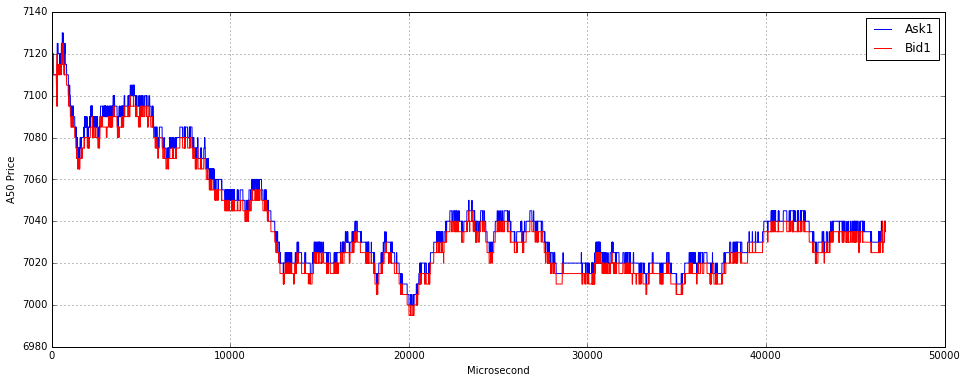

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
plt.grid()
plot(ask_price_1[2:len(ask_price_1)],label = 'Ask1',color = 'b')
plot(bid_price_1[2:len(ask_price_1)],label = 'Bid1',color = 'r')
plt.ylim(6980,7140)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

#### Bid 1 & Ask 1

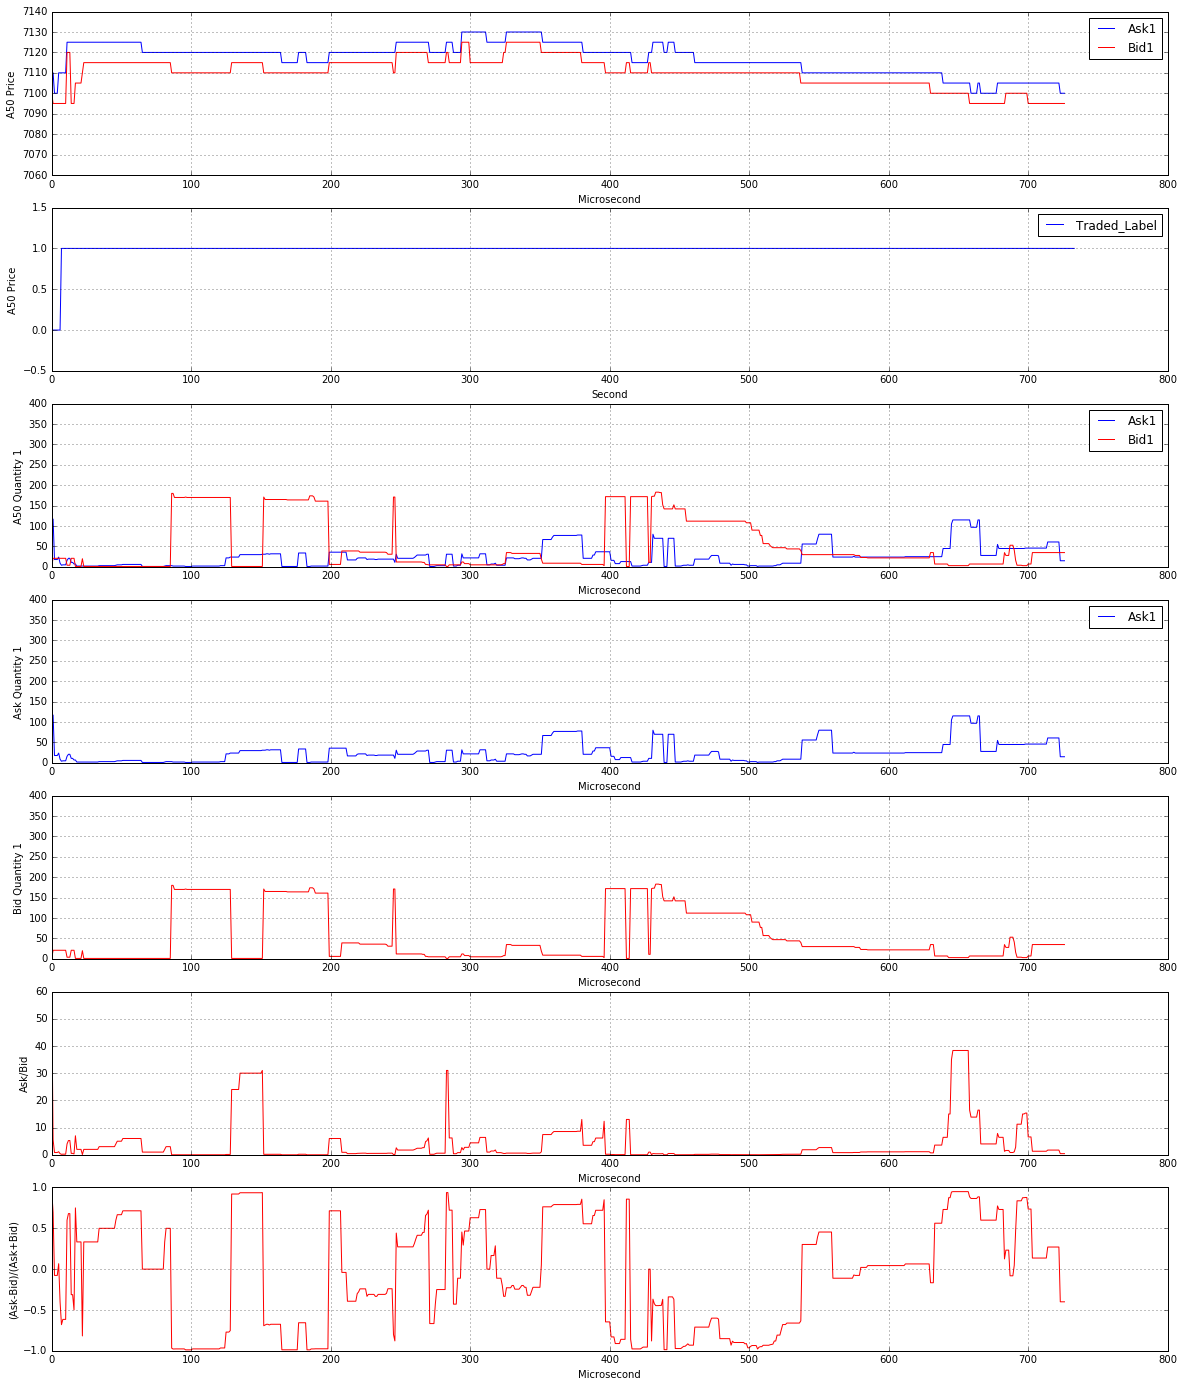

In [113]:
#Open 0 ~ 09:15
time1 = 294
time2 = 1021
plt.figure(figsize = (20,24))
plt.subplot(711)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7060,7140)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(712)
plt.grid()
plot(traded_micsecond_1,label = 'Traded_Label',color = 'b')
plt.ylim(-0.5,1.5)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(713)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)
plt.subplot(714)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)
plt.subplot(715)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("Bid Quantity 1")
plt.subplot(716)
plt.grid()
plot(ask_quantity_1[time1:time2]/bid_quantity_1[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("Ask/Bid")
plt.subplot(717)
plt.grid()
plot((ask_quantity_1[time1:time2]-bid_quantity_1[time1:time2])/\
     (ask_quantity_1[time1:time2]+bid_quantity_1[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

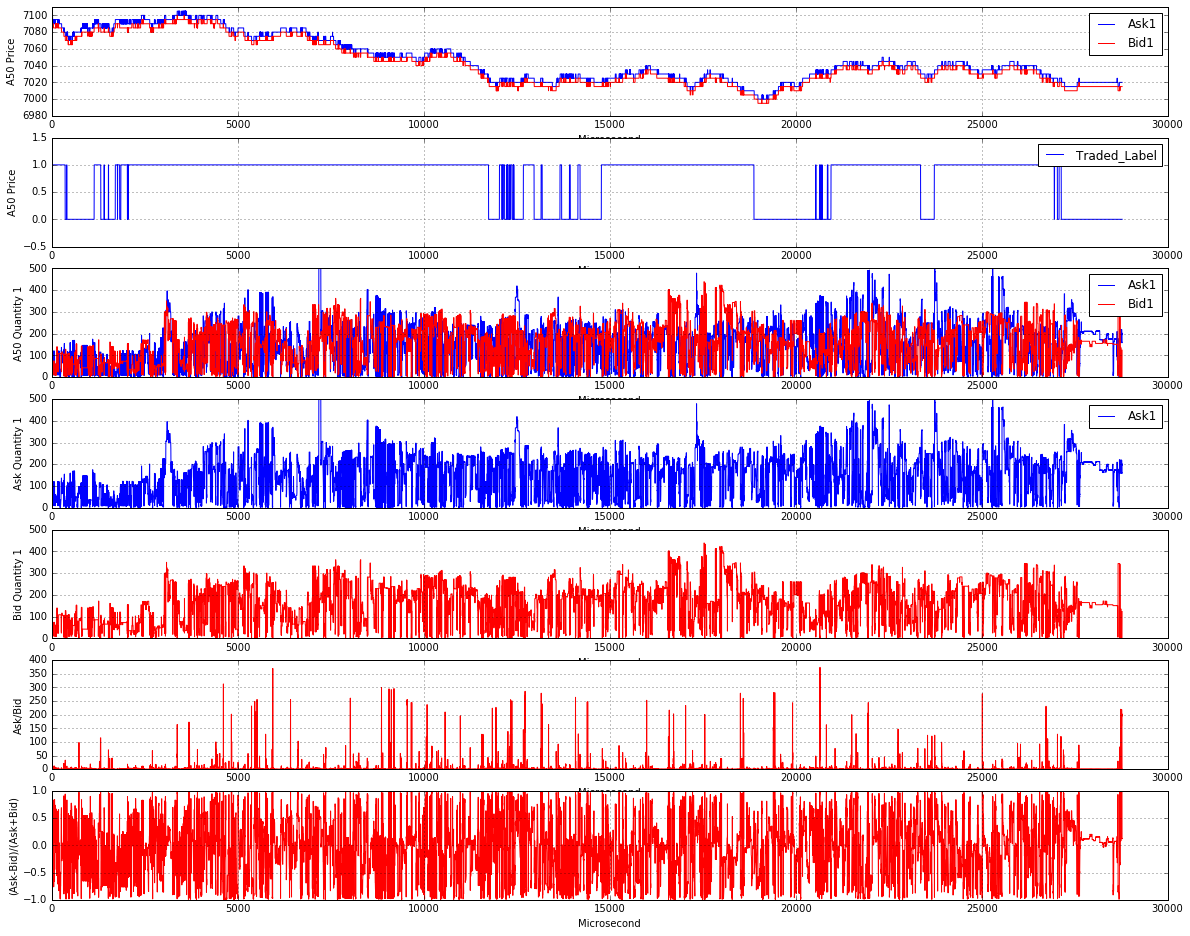

In [114]:
#Open 09:15 ~ 11:30
time1 = 1023
time2 = 29798
plt.figure(figsize = (20,16))
plt.subplot(711)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(6980,7110)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(712)
plt.grid()
plot(traded_micsecond_2,label = 'Traded_Label',color = 'b')
plt.ylim(-0.5,1.5)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(713)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Microsecond")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)

plt.subplot(714)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,500)
plt.xlabel("Microsecond")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)

plt.subplot(715)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Microsecond")
plt.ylabel("Bid Quantity 1")

plt.subplot(716)
plt.grid()
plot(ask_quantity_1[time1:time2]/bid_quantity_1[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("Ask/Bid")

plt.subplot(717)
plt.grid()
plot((ask_quantity_1[time1:time2]-bid_quantity_1[time1:time2])/\
     (ask_quantity_1[time1:time2]+bid_quantity_1[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

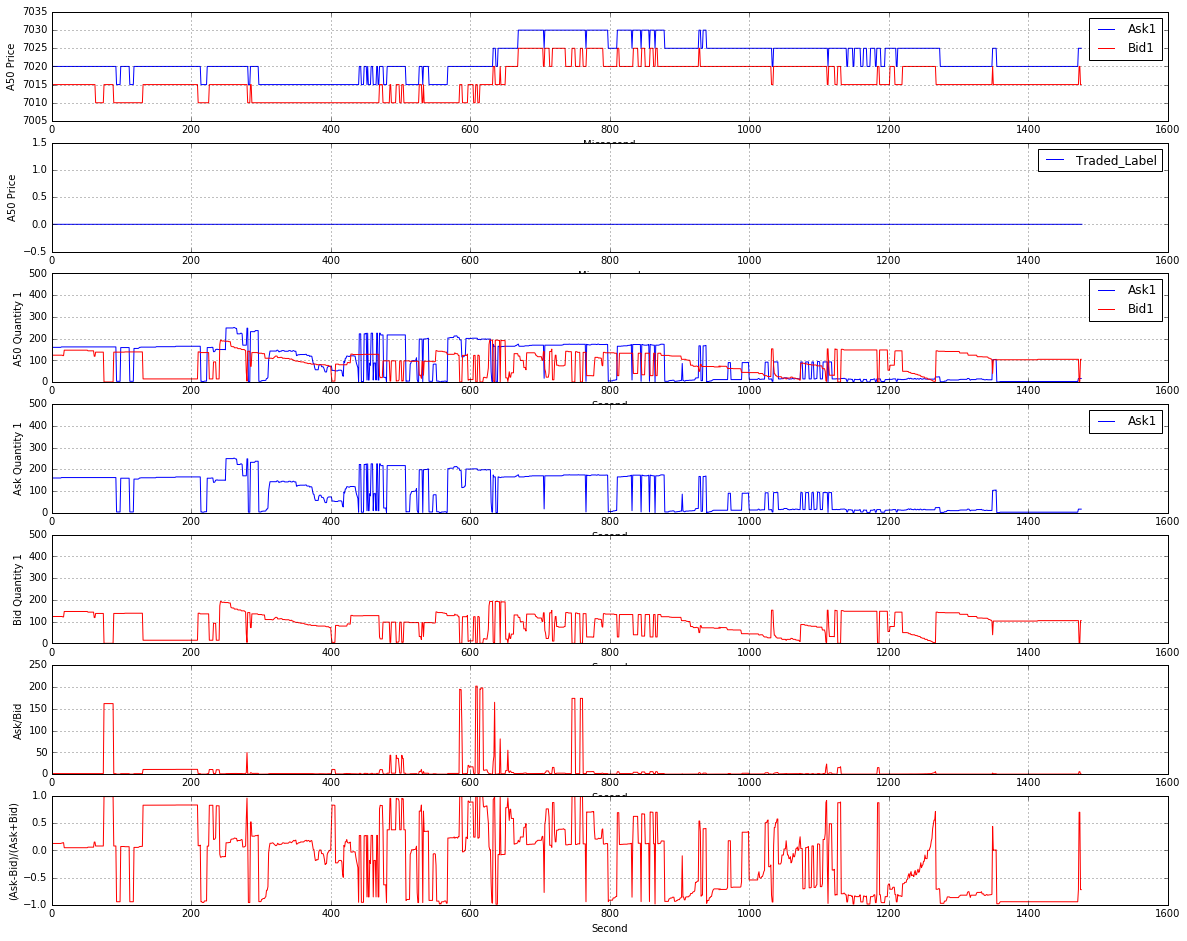

In [116]:
#Open 11:30 ~ 13:00 => china close
time1 = 29799
time2 = 31276
plt.figure(figsize = (20,16))

plt.subplot(711)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7005,7035)
plt.xlabel("Micsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(712)
plt.grid()
plot(traded_micsecond_3,label = 'Traded_Label',color = 'b')
plt.ylim(-0.5,1.5)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(713)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)

plt.subplot(714)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)

plt.subplot(715)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 1")

plt.subplot(716)
plt.grid()
plot(ask_quantity_1[time1:time2]/bid_quantity_1[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(717)
plt.grid()
plot((ask_quantity_1[time1:time2]-bid_quantity_1[time1:time2])/\
     (ask_quantity_1[time1:time2]+bid_quantity_1[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

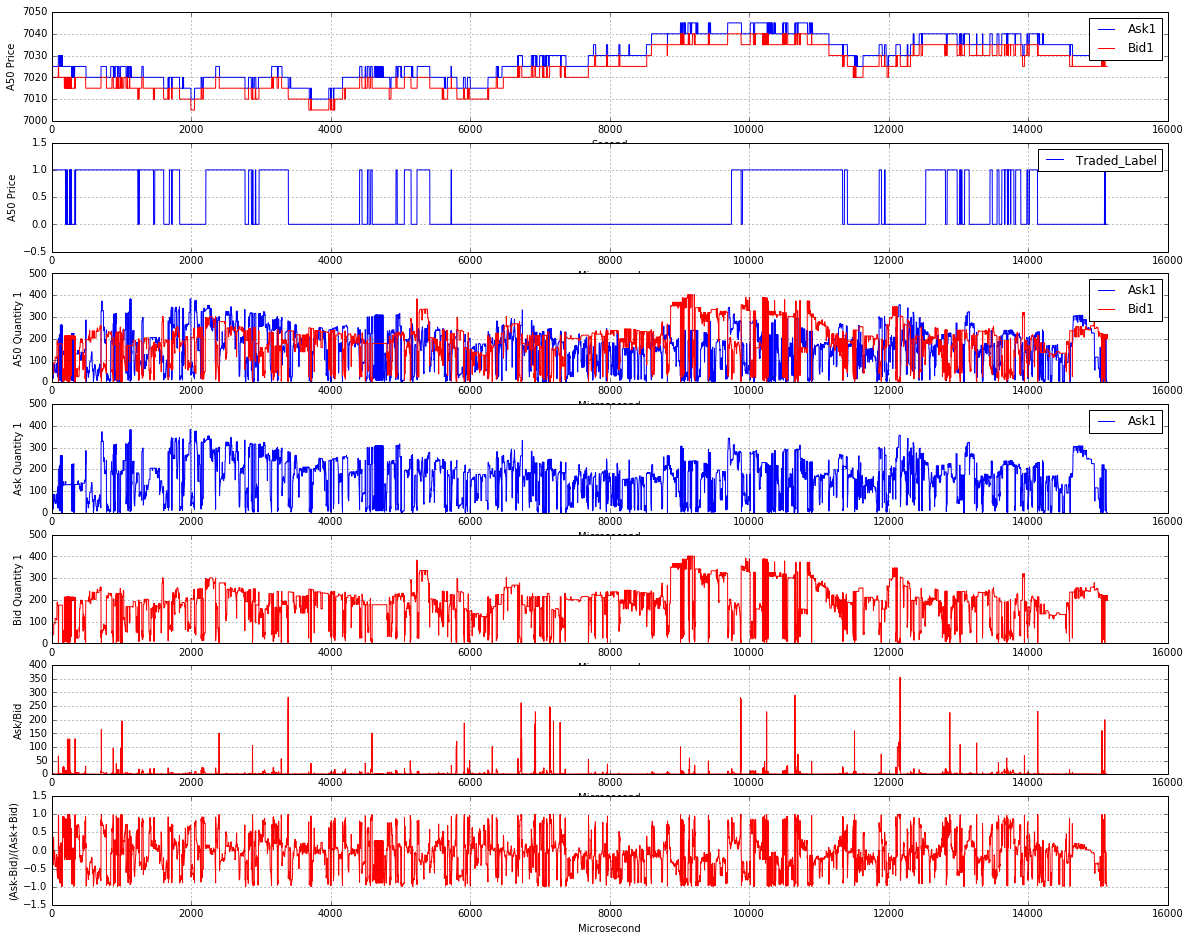

In [120]:
#Open 13:00 ~ 16:00
time1 = 31279
time2 = 46412
plt.figure(figsize = (20,16))
plt.subplot(711)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7000,7050)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(712)
plt.grid()
plot(traded_micsecond_4,label = 'Traded_Label',color = 'b')
plt.ylim(-0.5,1.5)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(713)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Microsecond")
plt.ylabel("A50 Quantity 1")
plt.legend(loc = 1)

plt.subplot(714)
plt.grid()
plot(ask_quantity_1[time1:time2],label = 'Ask1',color = 'b')
plt.ylim(0,500)
plt.xlabel("Microsecond")
plt.ylabel("Ask Quantity 1")
plt.legend(loc = 1)

plt.subplot(715)
plt.grid()
plot(bid_quantity_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(0,500)
plt.xlabel("Microsecond")
plt.ylabel("Bid Quantity 1")

plt.subplot(716)
plt.grid()
plot(ask_quantity_1[time1:time2]/bid_quantity_1[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("Ask/Bid")

plt.subplot(717)
plt.grid()
plot((ask_quantity_1[time1:time2]-bid_quantity_1[time1:time2])/\
     (ask_quantity_1[time1:time2]+bid_quantity_1[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
plt.ylim(-1.5,1.5)
plt.xlabel("Microsecond")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

#### Bid2 & Ask2

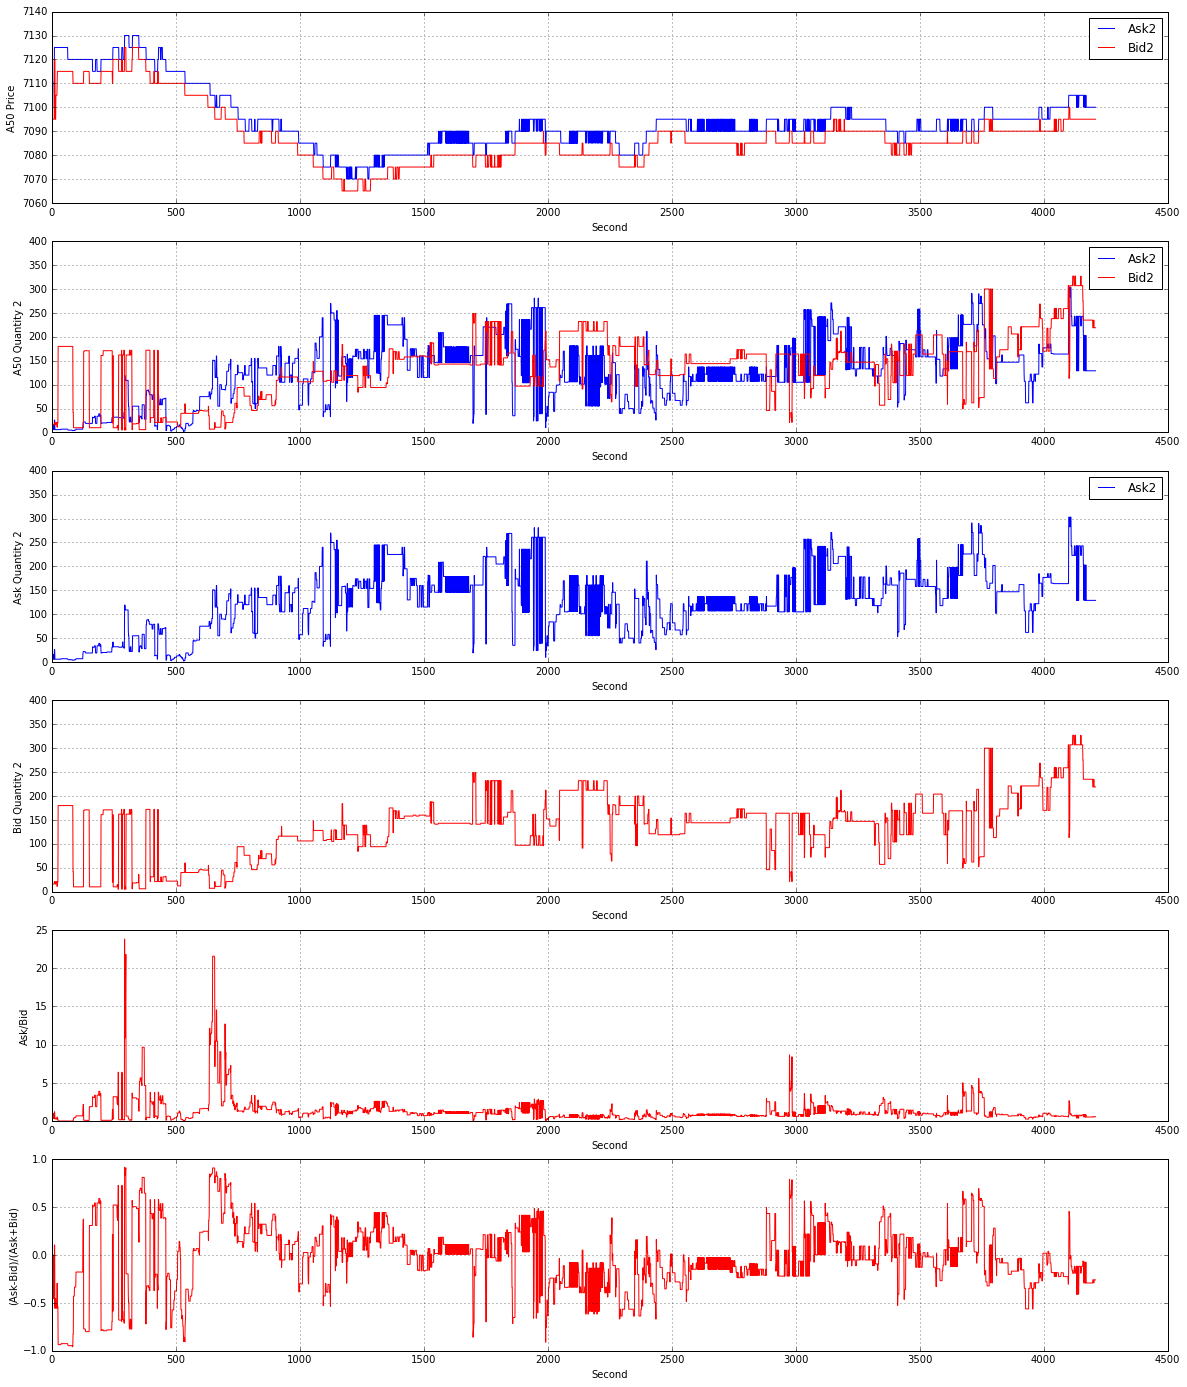

In [38]:
#Open 0 ~ 09:15
time1 = 294
time2 = 4504
plt.figure(figsize = (20,24))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask2',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(7060,7140)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 2")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 2")
plt.subplot(615)
plt.grid()
plot(ask_quantity_2[time1:time2]/bid_quantity_2[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_2[time1:time2]-bid_quantity_2[time1:time2])/\
     (ask_quantity_2[time1:time2]+bid_quantity_2[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

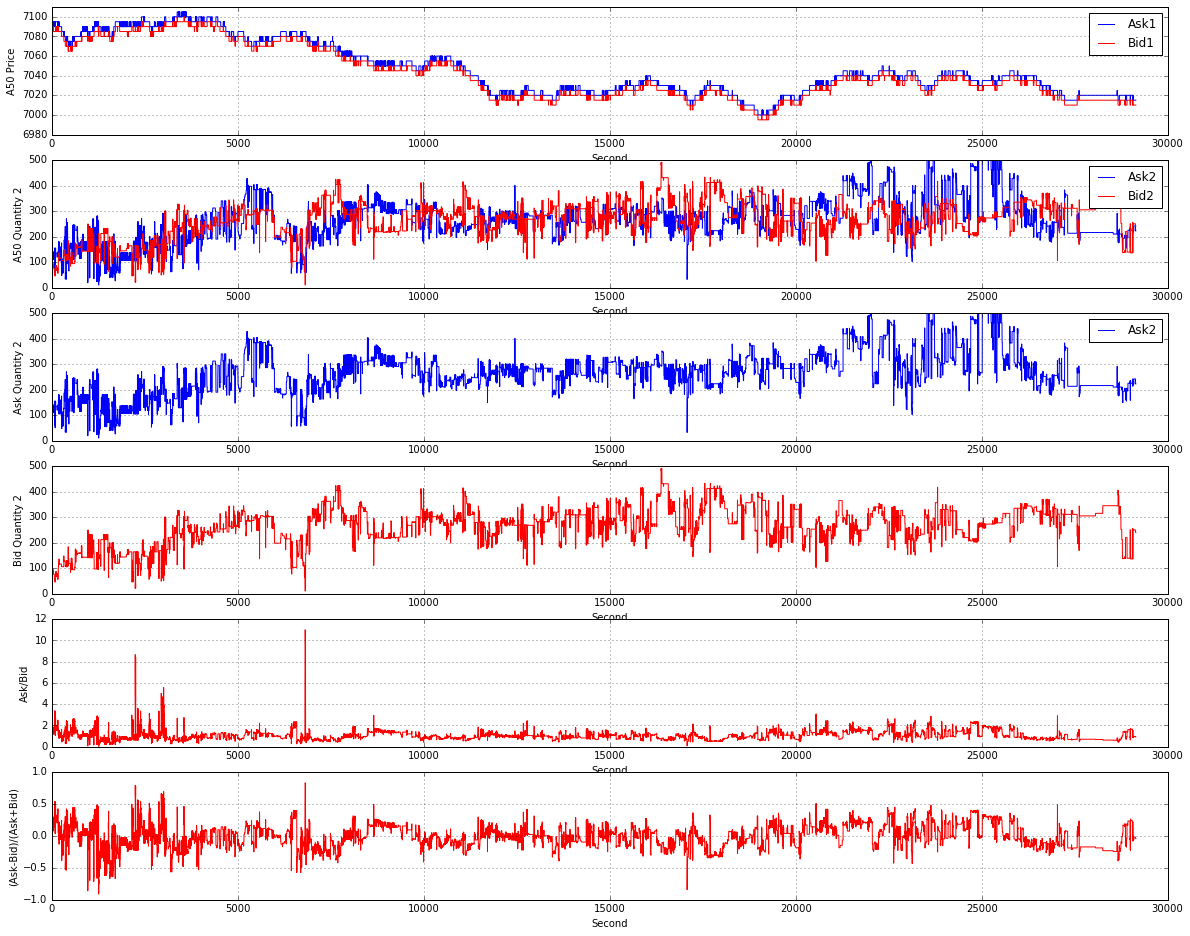

In [39]:
#Open 09:15 ~ 11:30
time1 = 1023
time2 = 30167
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(6980,7110)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 2")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 2")

plt.subplot(615)
plt.grid()
plot(ask_quantity_2[time1:time2]/bid_quantity_2[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_2[time1:time2]-bid_quantity_2[time1:time2])/\
     (ask_quantity_2[time1:time2]+bid_quantity_2[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

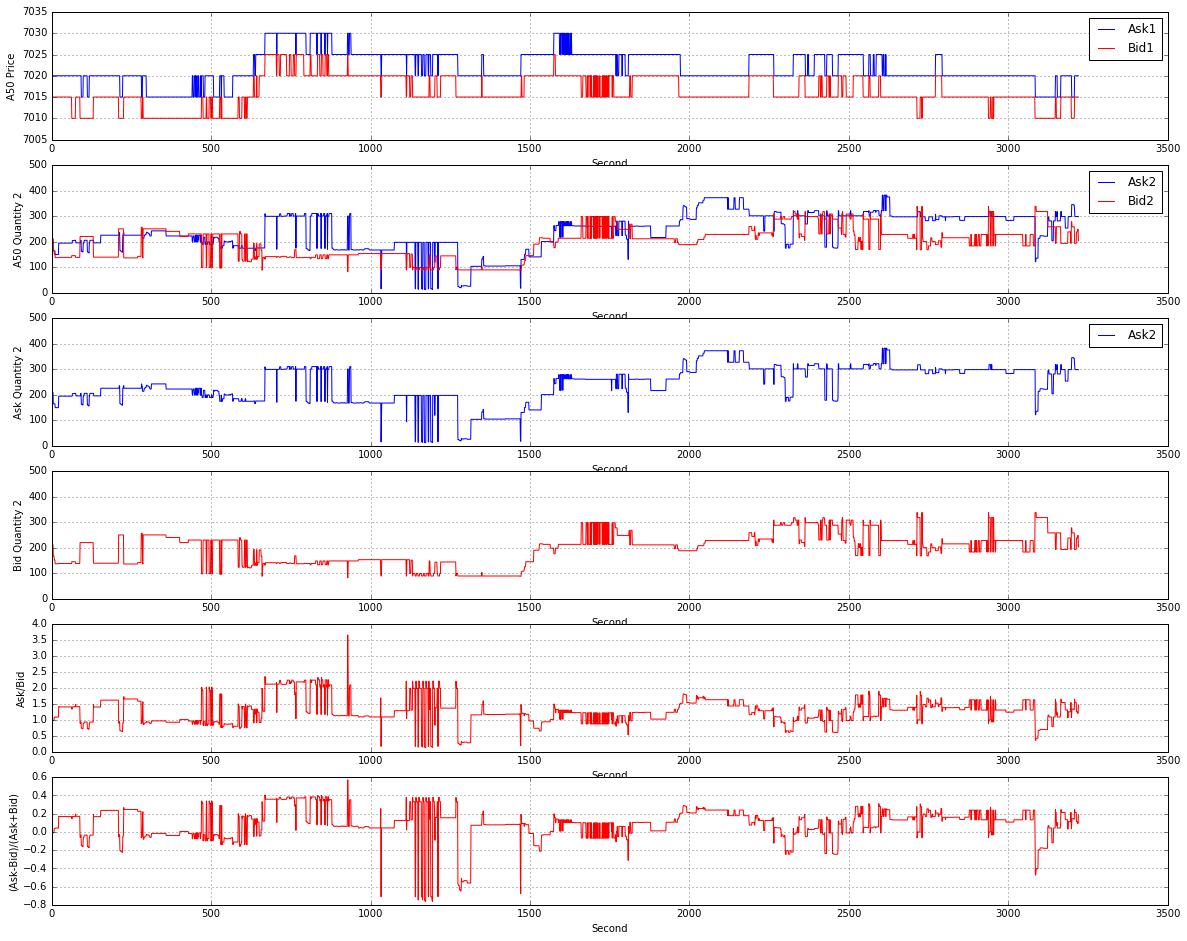

In [40]:
#Open 11:30 ~ 13:00 => china close
time1 = 29799
time2 = 33020
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7005,7035)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 2")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 2")

plt.subplot(615)
plt.grid()
plot(ask_quantity_2[time1:time2]/bid_quantity_2[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_2[time1:time2]-bid_quantity_2[time1:time2])/\
     (ask_quantity_2[time1:time2]+bid_quantity_2[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

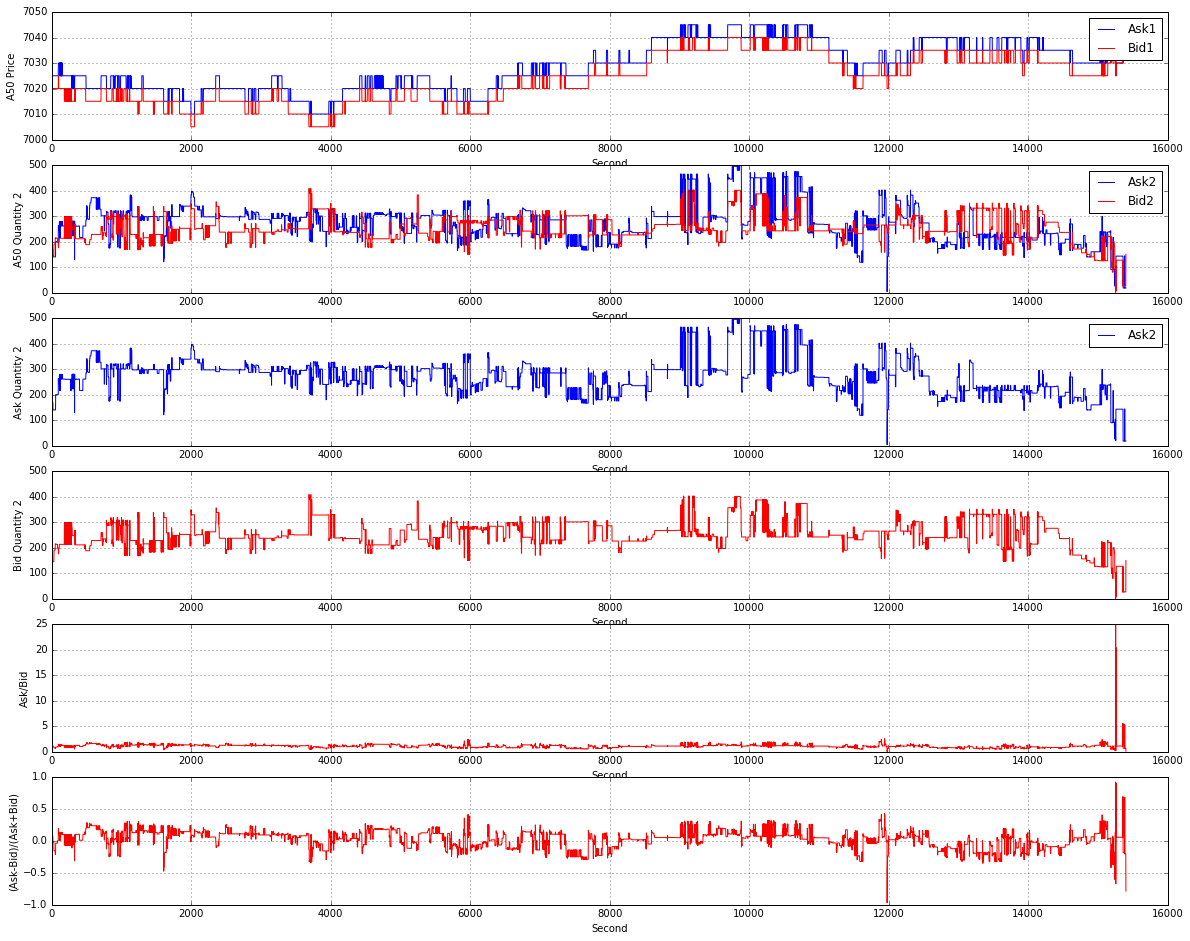

In [41]:
#Open 13:00 ~ 16:00
time1 = 31279
time2 = 46681
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7000,7050)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 2")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_2[time1:time2],label = 'Ask2',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_2[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 2")

plt.subplot(615)
plt.grid()
plot(ask_quantity_2[time1:time2]/bid_quantity_2[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_2[time1:time2]-bid_quantity_2[time1:time2])/\
     (ask_quantity_2[time1:time2]+bid_quantity_2[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

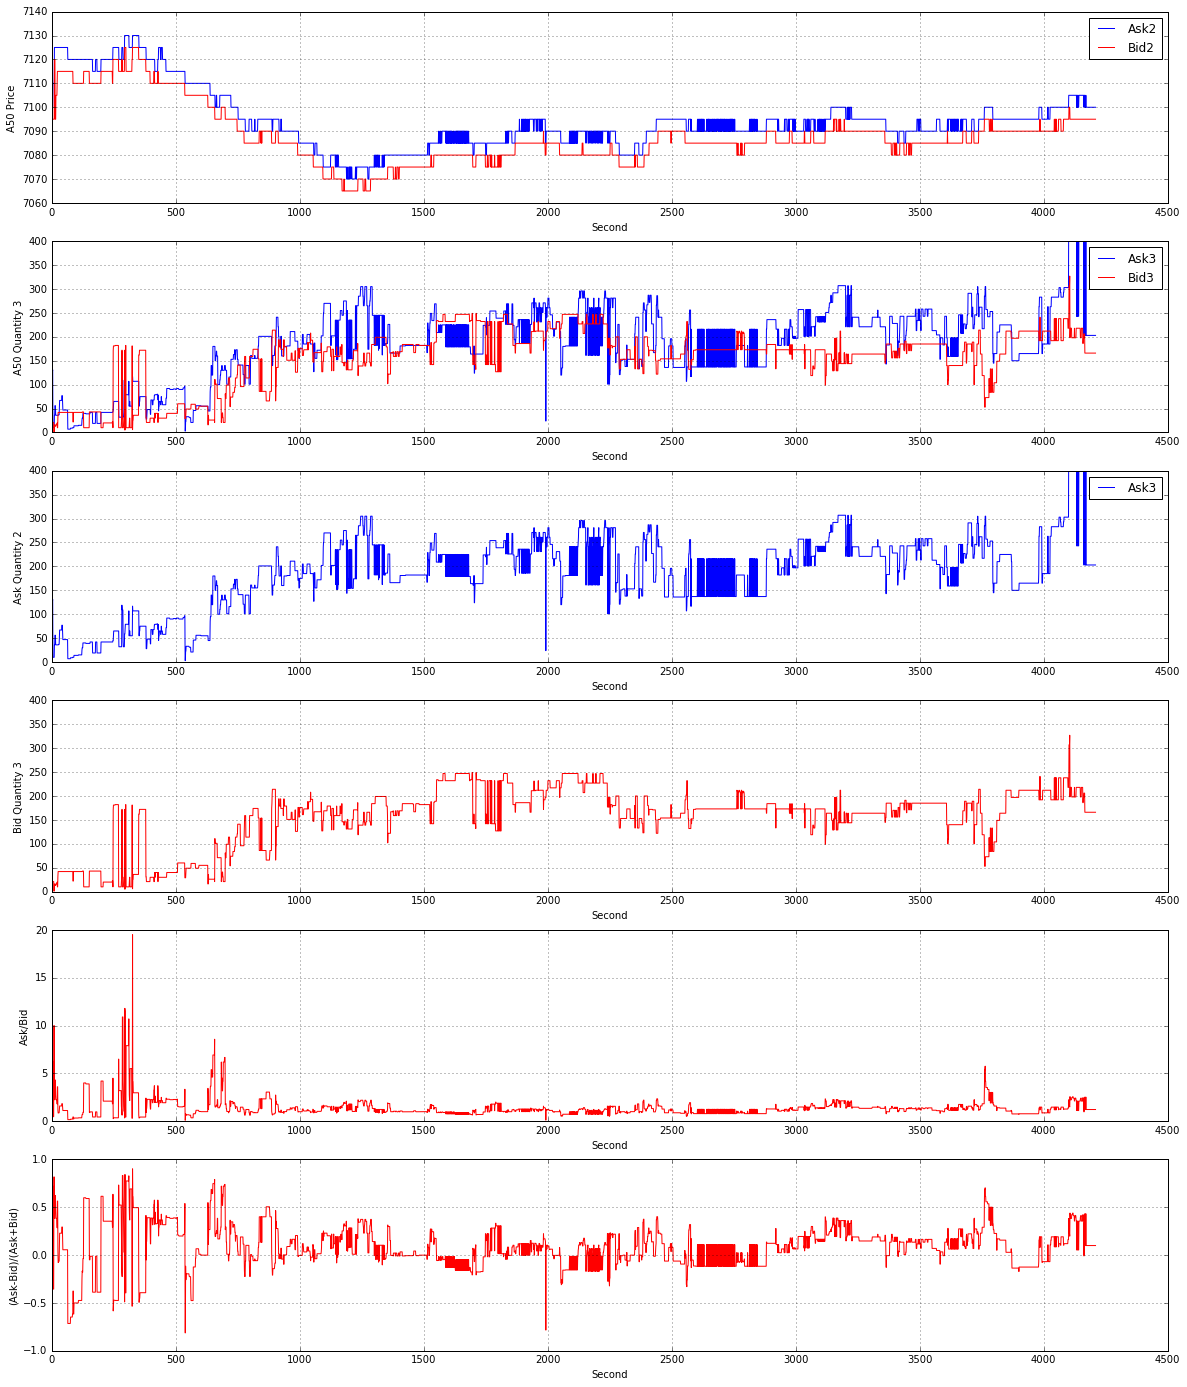

In [42]:
#Open 0 ~ 09:15
time1 = 294
time2 = 4504
plt.figure(figsize = (20,24))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask2',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid2',color = 'r')
plt.ylim(7060,7140)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 3")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 2")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 3")
plt.subplot(615)
plt.grid()
plot(ask_quantity_3[time1:time2]/bid_quantity_3[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_3[time1:time2]-bid_quantity_3[time1:time2])/\
     (ask_quantity_3[time1:time2]+bid_quantity_3[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

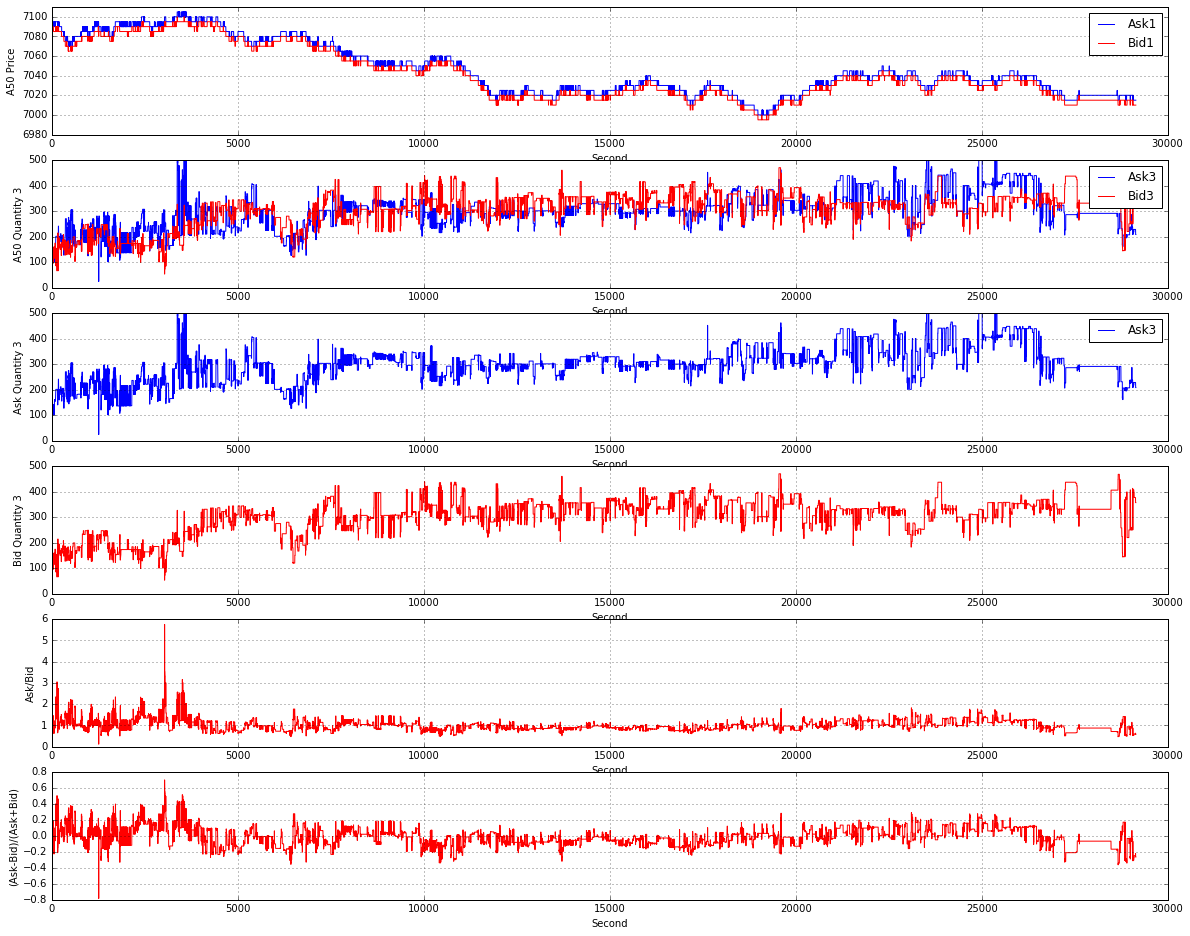

In [43]:
#Open 09:15 ~ 11:30
time1 = 1023
time2 = 30167
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(6980,7110)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 3")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 3")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 3")

plt.subplot(615)
plt.grid()
plot(ask_quantity_3[time1:time2]/bid_quantity_3[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_3[time1:time2]-bid_quantity_3[time1:time2])/\
     (ask_quantity_3[time1:time2]+bid_quantity_3[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

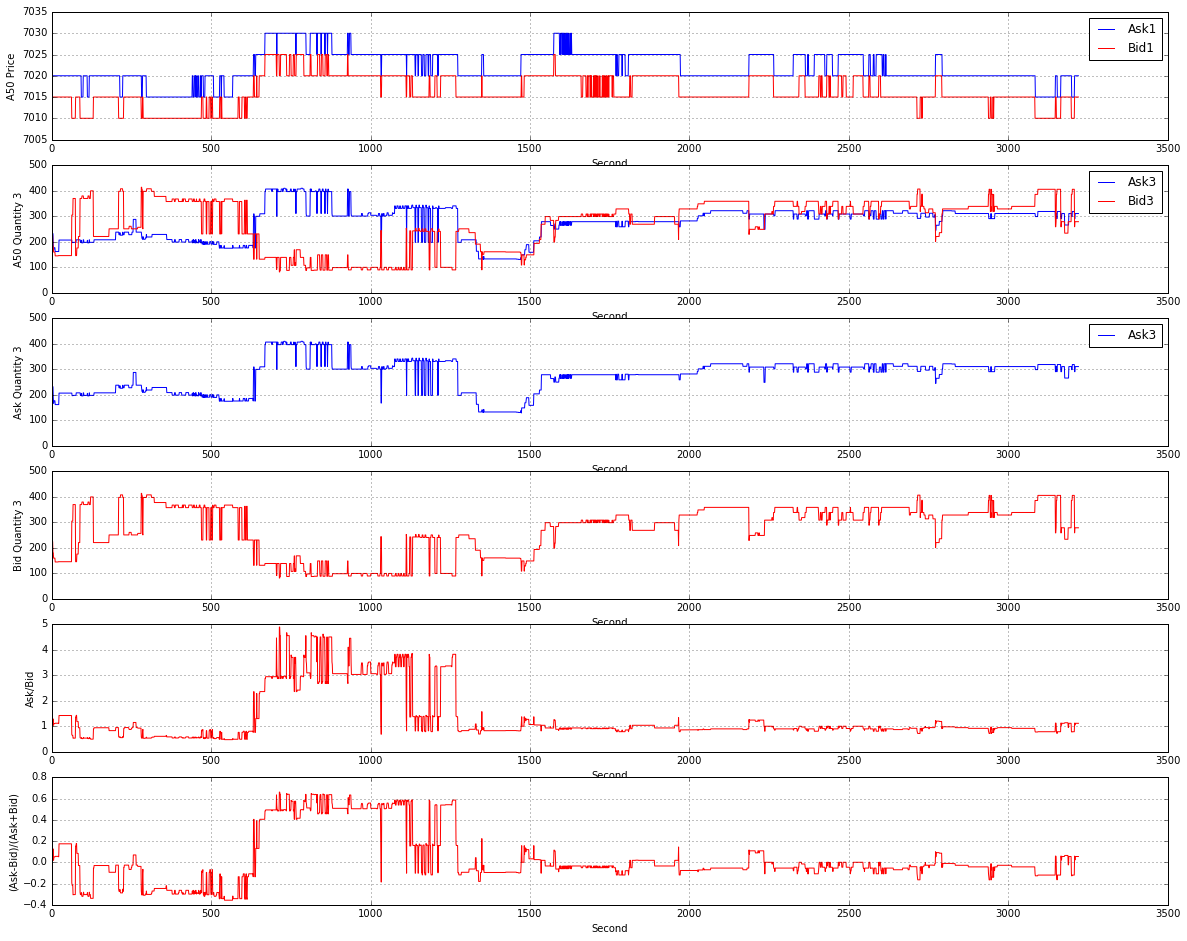

In [44]:
#Open 11:30 ~ 13:00 => china close
time1 = 29799
time2 = 33020
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7005,7035)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 3")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 3")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 3")

plt.subplot(615)
plt.grid()
plot(ask_quantity_3[time1:time2]/bid_quantity_3[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_3[time1:time2]-bid_quantity_3[time1:time2])/\
     (ask_quantity_3[time1:time2]+bid_quantity_3[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

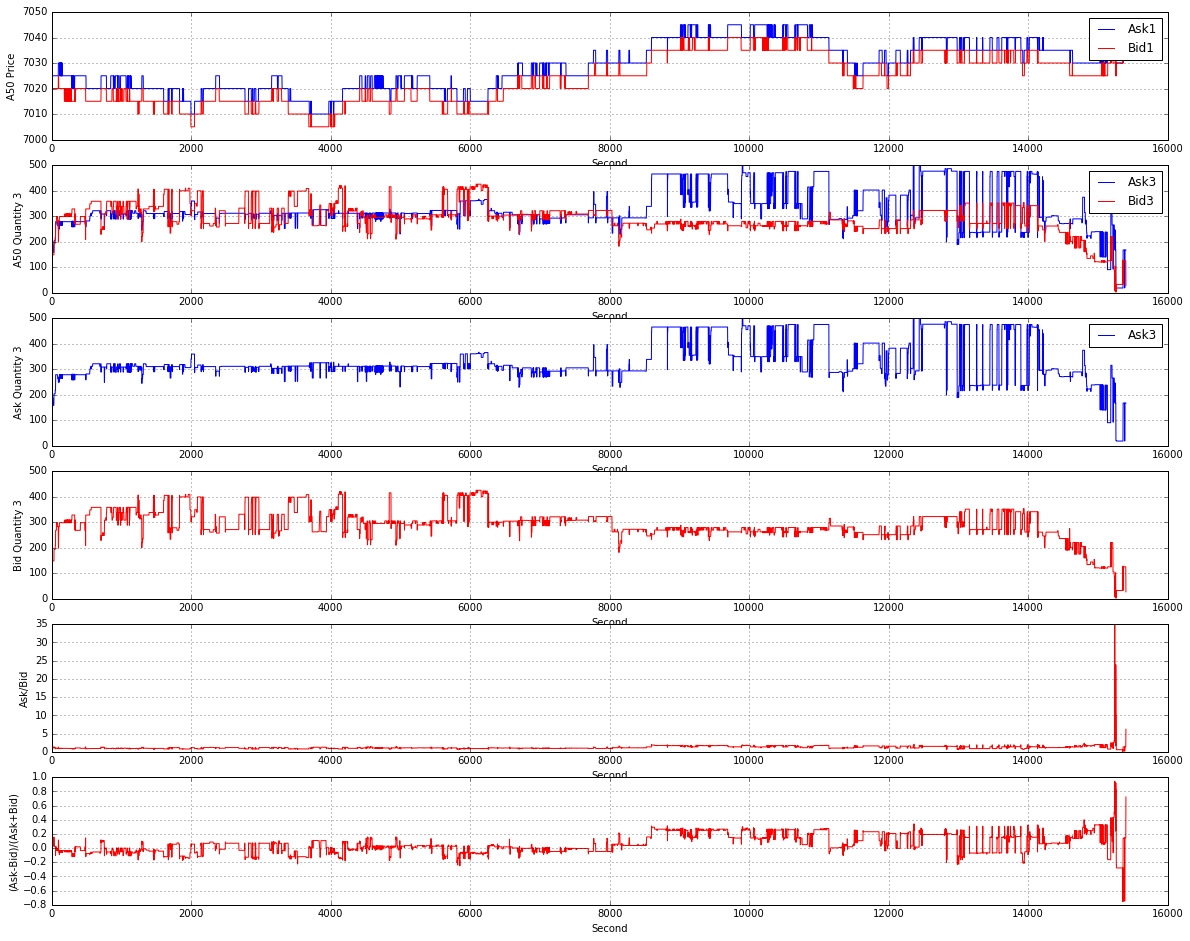

In [45]:
#Open 13:00 ~ 16:00
time1 = 31279
time2 = 46681
plt.figure(figsize = (20,16))
plt.subplot(611)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7000,7050)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)
plt.subplot(612)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("A50 Quantity 3")
plt.legend(loc = 1)
plt.subplot(613)
plt.grid()
plot(ask_quantity_3[time1:time2],label = 'Ask3',color = 'b')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Ask Quantity 3")
plt.legend(loc = 1)
plt.subplot(614)
plt.grid()
plot(bid_quantity_3[time1:time2],label = 'Bid3',color = 'r')
plt.ylim(0,500)
plt.xlabel("Second")
plt.ylabel("Bid Quantity 3")

plt.subplot(615)
plt.grid()
plot(ask_quantity_3[time1:time2]/bid_quantity_3[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("Ask/Bid")
plt.subplot(616)
plt.grid()
plot((ask_quantity_3[time1:time2]-bid_quantity_3[time1:time2])/\
     (ask_quantity_3[time1:time2]+bid_quantity_3[time1:time2]),label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

In [150]:
Weight_Ask = (50.0 * ask_quantity_1 + 30.0 * ask_quantity_2 + 20.0 * ask_quantity_3)
Weight_Bid = (50.0 * bid_quantity_1 + 30.0 * bid_quantity_2 + 20.0 * bid_quantity_3)

In [154]:
W_AB = Weight_Ask/Weight_Bid

In [155]:
W_A_B = (Weight_Ask - Weight_Bid)/(Weight_Ask + Weight_Bid)

#### Weighting Depth 

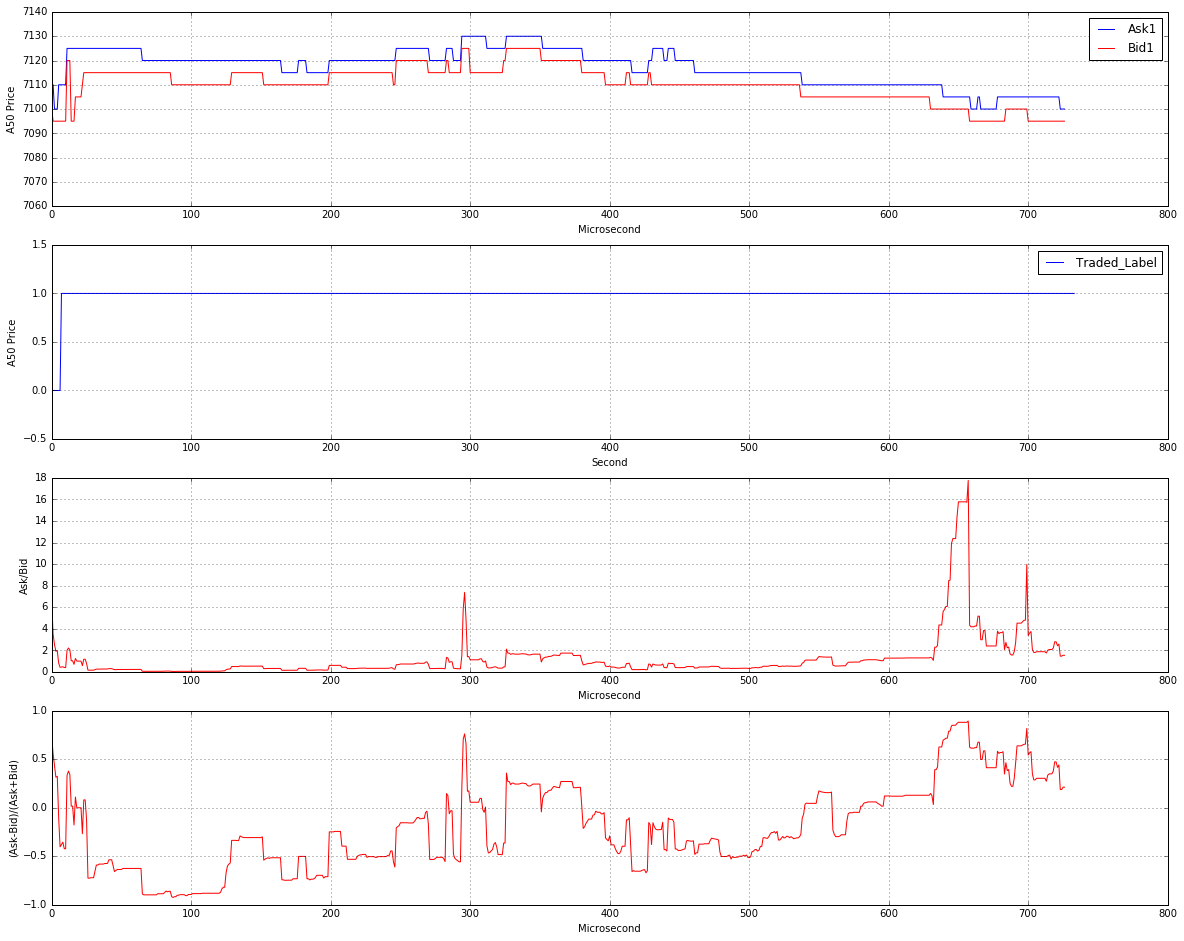

In [163]:
#Open 0 ~ 09:15
time1 = 294
time2 = 1021
plt.figure(figsize = (20,16))
plt.subplot(411)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7060,7140)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(412)
plt.grid()
plot(traded_micsecond_1,label = 'Traded_Label',color = 'b')
plt.ylim(-0.5,1.5)
plt.xlabel("Second")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(413)
plt.grid()
plot(W_AB[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("Ask/Bid")
plt.subplot(414)
plt.grid()
plot(W_A_B[time1:time2],label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

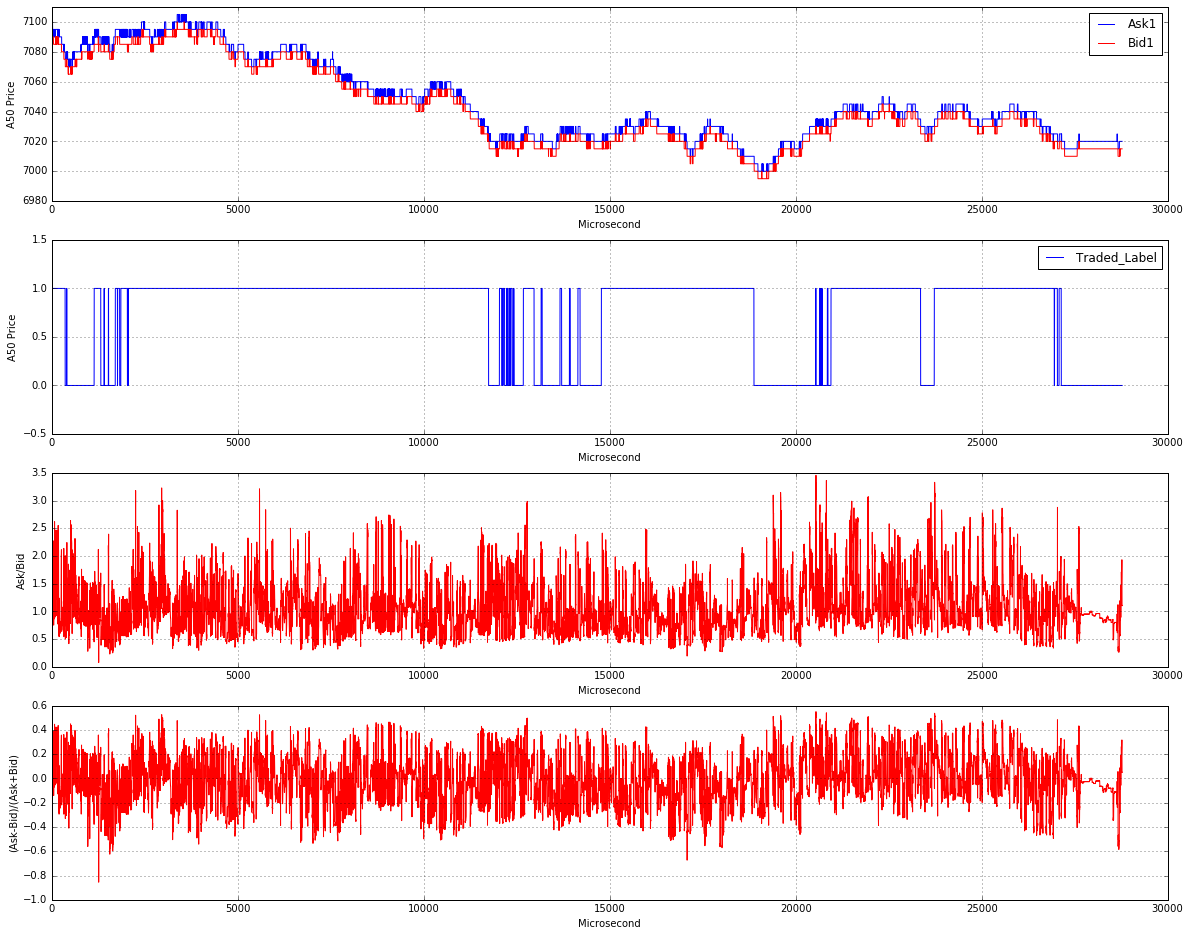

In [160]:
#Open 09:15 ~ 11:30
time1 = 1023
time2 = 29798
plt.figure(figsize = (20,16))
plt.subplot(411)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(6980,7110)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(412)
plt.grid()
plot(traded_micsecond_2,label = 'Traded_Label',color = 'b')
plt.ylim(-0.5,1.5)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(413)
plt.grid()
plot(W_AB[time1:time2],label = 'Ask/Bid',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("Ask/Bid")

plt.subplot(414)
plt.grid()
plot(W_A_B[time1:time2],label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
#plt.ylim(0,400)
plt.xlabel("Microsecond")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

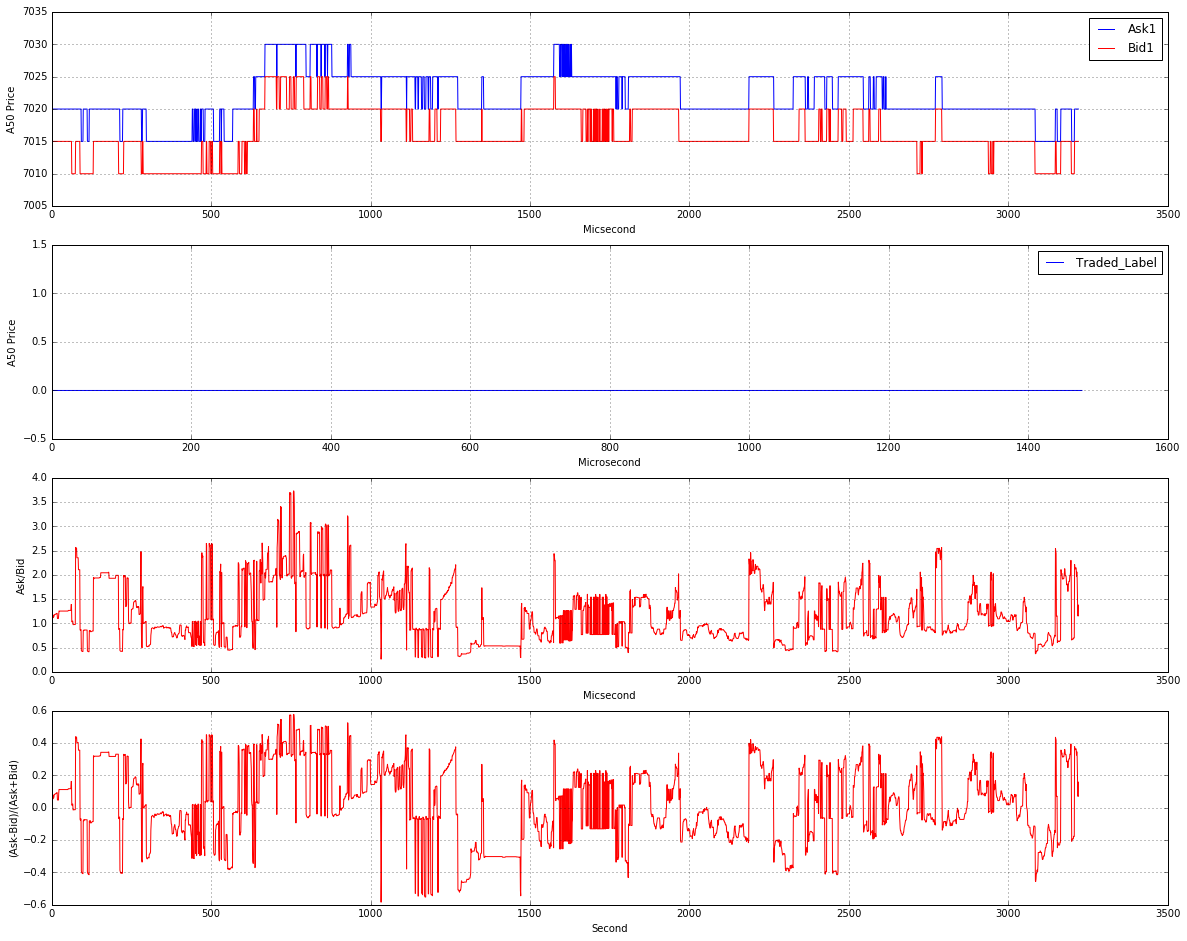

In [162]:
#Open 11:30 ~ 13:00 => china close
time1 = 29799
time2 = 33020
plt.figure(figsize = (20,16))
plt.subplot(411)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7005,7035)
plt.xlabel("Micsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(412)
plt.grid()
plot(traded_micsecond_3,label = 'Traded_Label',color = 'b')
plt.ylim(-0.5,1.5)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(413)
plt.grid()
plot(W_AB[time1:time2],label = 'Ask/Bid',color = 'r')
plt.xlabel("Micsecond")
plt.ylabel("Ask/Bid")

plt.subplot(414)
plt.grid()
plot(W_A_B[time1:time2],label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
plt.xlabel("Second")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")

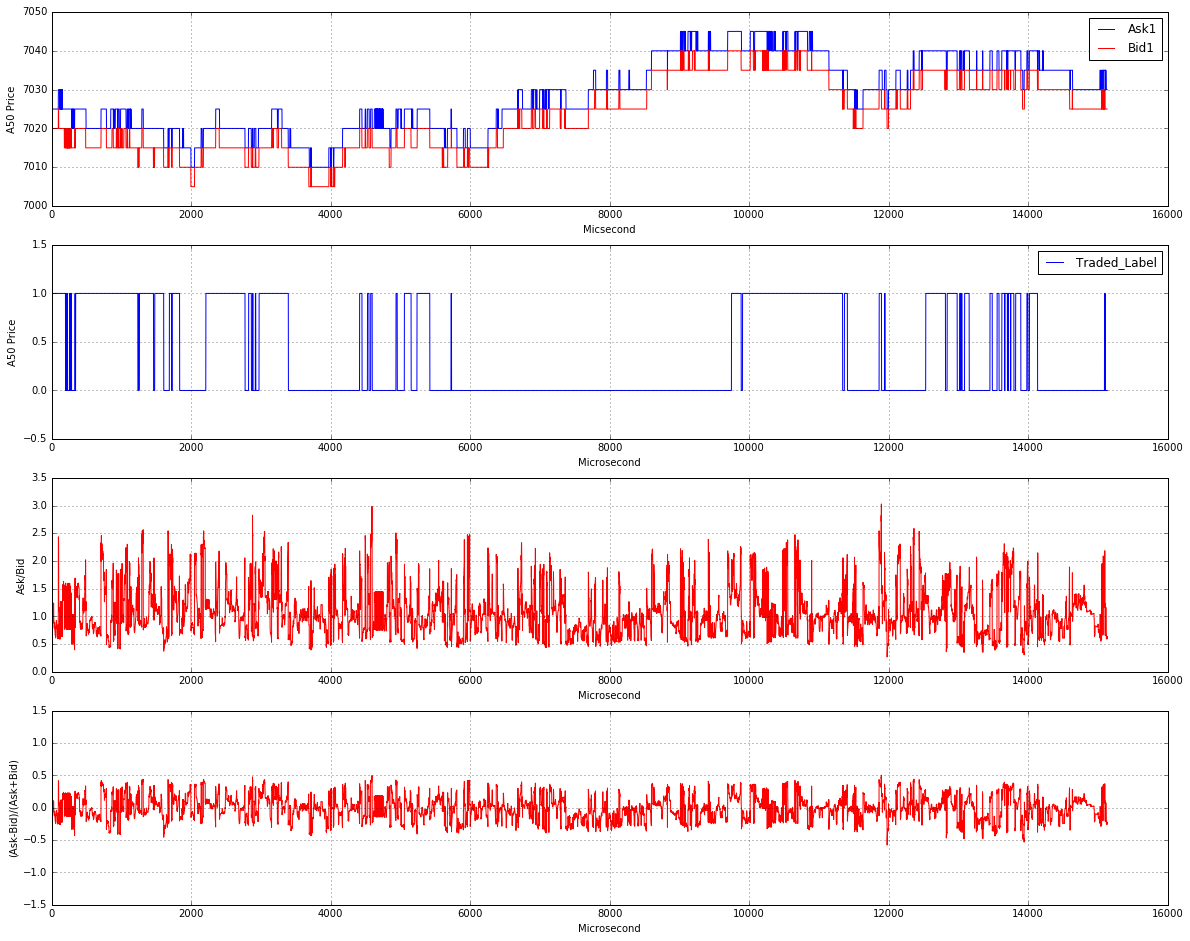

In [164]:
#Open 13:00 ~ 16:00
time1 = 31279
time2 = 46412
plt.figure(figsize = (20,16))
plt.subplot(411)
plt.grid()
plot(ask_price_1[time1:time2],label = 'Ask1',color = 'b')
plot(bid_price_1[time1:time2],label = 'Bid1',color = 'r')
plt.ylim(7000,7050)
plt.xlabel("Micsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(412)
plt.grid()
plot(traded_micsecond_4,label = 'Traded_Label',color = 'b')
plt.ylim(-0.5,1.5)
plt.xlabel("Microsecond")
plt.ylabel("A50 Price")
plt.legend(loc = 1)

plt.subplot(413)
plt.grid()
plot(W_AB[time1:time2],label = 'Ask/Bid',color = 'r')
plt.xlabel("Microsecond")
plt.ylabel("Ask/Bid")

plt.subplot(414)
plt.grid()
plot(W_A_B[time1:time2],label = '(Ask-Bid)/(Ask+Bid)',color = 'r')
plt.ylim(-1.5,1.5)
plt.xlabel("Microsecond")
plt.ylabel("(Ask-Bid)/(Ask+Bid)")